In [2]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

In [3]:
immo_dataset = pd.read_csv('fulldata.csv')

immo_dataset.head(15)


,locality,postal_code,region,property_type,subtype_property,price,contruction_year,type_of_sale,number_of_rooms,living_area,...,has_open_fire,has_terrace,terrace_area,has_garden,garden_surface,habitable_surface,plot_land_surface,number_of_facades,has_swimming_pool,building_state
0,Deinze,9800,Flanders,APARTMENT,APARTMENT,395000.0,2023.0,residential_sale,2,22.0,...,0,1,12.0,1,NaN,99.0,NaN,4.0,0,AS_NEW
1,Halle,1500,Flanders,HOUSE,HOUSE,385000.0,NaN,residential_sale,3,NaN,...,0,0,NaN,0,NaN,158.0,NaN,NaN,0,NaN
2,Antwerp,2060,Flanders,APARTMENT,APARTMENT,140000.0,NaN,residential_sale,1,NaN,...,0,1,8.0,0,NaN,44.0,NaN,NaN,0,NaN
3,Antwerp,2018,Flanders,APARTMENT,APARTMENT,215000.0,NaN,residential_sale,2,NaN,...,0,0,NaN,0,NaN,75.0,NaN,NaN,0,NaN
4,Edegem,2650,Flanders,APARTMENT,APARTMENT,349900.0,NaN,residential_sale,2,NaN,...,0,1,NaN,0,NaN,103.0,NaN,NaN,0,NaN
5,Tremelo,3128,Flanders,HOUSE,HOUSE,380000.0,1993.0,residential_sale,4,40.0,...,0,1,NaN,0,NaN,220.0,863.0,4.0,0,TO_RENOVATE
6,Tielt-Winge,3390,Flanders,HOUSE,HOUSE,510000.0,2024.0,residential_sale,5,30.0,...,0,1,NaN,0,NaN,224.0,693.0,3.0,0,AS_NEW
7,Denderleeuw,9470,Flanders,HOUSE,HOUSE,339000.0,NaN,residential_sale,3,NaN,...,0,1,NaN,0,NaN,165.0,NaN,NaN,0,NaN
8,Knokke,8300,Flanders,APARTMENT,APARTMENT,765000.0,NaN,residential_sale,2,NaN,...,0,1,10.0,0,NaN,96.0,NaN,NaN,0,NaN
9,Molenbeek-Saint-Jean,1080,Brussels,APARTMENT,APARTMENT,339000.0,NaN,residential_sale,3,NaN,...,1,0,NaN,0,NaN,140.0,NaN,NaN,0,NaN


In [4]:
immo_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11243 entries, 0 to 11242
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   locality               11243 non-null  object 
 1   postal_code            11243 non-null  object 
 2   region                 11171 non-null  object 
 3   property_type          11243 non-null  object 
 4   subtype_property       11243 non-null  object 
 5   price                  11242 non-null  float64
 6   contruction_year       2406 non-null   float64
 7   type_of_sale           11243 non-null  object 
 8   number_of_rooms        11243 non-null  int64  
 9   living_area            3438 non-null   float64
 10  kitchen_fully_equiped  3438 non-null   float64
 11  is_furnished           11243 non-null  int64  
 12  has_open_fire          11243 non-null  int64  
 13  has_terrace            11243 non-null  int64  
 14  terrace_area           4678 non-null   float64
 15  ha

Data Cleaning

Fill empty values

In [5]:
missing_percentage = immo_dataset.isna().mean() * 100
print(missing_percentage)

locality                  0.000000
postal_code               0.000000
region                    0.640398
property_type             0.000000
subtype_property          0.000000
price                     0.008894
contruction_year         78.600018
type_of_sale              0.000000
number_of_rooms           0.000000
living_area              69.420973
kitchen_fully_equiped    69.420973
is_furnished              0.000000
has_open_fire             0.000000
has_terrace               0.000000
terrace_area             58.391888
has_garden                0.000000
garden_surface           78.004091
habitable_surface         5.398915
plot_land_surface        75.673753
number_of_facades        73.974918
has_swimming_pool         0.000000
building_state           73.049898
dtype: float64


Replace space in postal_code

In [6]:
immo_dataset['postal_code'] = immo_dataset['postal_code'].str.replace(' ', '')

Remove letters from postal codes.

In [7]:
immo_dataset['postal_code'] = immo_dataset['postal_code'].str.replace('MK', '')
immo_dataset['postal_code'] = immo_dataset['postal_code'].str.replace('AN', '')
immo_dataset['postal_code'] = immo_dataset['postal_code'].str.replace('KA', '')
immo_dataset['postal_code'] = immo_dataset['postal_code'].str.replace('AG', '')

Remove erronous Postal Codes (with more than 4 digits)

In [8]:
res = immo_dataset[immo_dataset['postal_code'].map(lambda x: len(x) >= 5)]
immo_dataset.drop(res.index, inplace=True)
print(immo_dataset['postal_code'].unique())
print(immo_dataset.shape)

['9800' '1500' '2060' '2018' '2650' '3128' '3390' '9470' '8300' '1080'
 '1830' '3910' '6637' '1170' '2100' '1370' '2940' '2610' '1050' '9050'
 '8800' '9100' '9870' '1800' '2860' '2580' '9991' '9000' '8587' '8434'
 '8810' '8770' '3630' '7900' '3221' '3730' '3800' '2280' '7912' '1020'
 '2560' '2243' '9290' '1760' '2440' '8000' '4367' '9600' '4000' '4041'
 '1440' '2830' '1200' '1030' '1070' '4100' '4690' '4020' '8370' '3680'
 '9070' '3070' '8860' '2450' '8301' '2660' '3830' '3500' '3840' '3720'
 '4820' '6940' '1653' '4430' '2620' '4500' '9770' '4102' '6792' '9750'
 '1040' '1410' '1820' '9120' '8630' '9472' '3000' '9820' '3010' '1180'
 '1000' '2170' '2850' '2340' '1790' '8740' '7190' '8500' '1495' '6030'
 '3990' '3150' '9968' '1300' '1140' '5100' '2970' '7620' '9160' '9032'
 '9900' '9300' '9660' '1210' '1060' '8690' '1755' '8647' '3020' '1700'
 '4340' '1090' '1480' '8930' '6042' '9260' '7940' '8660' '1420' '1740'
 '2000' '1780' '4040' '1083' '2570' '2380' '4680' '1160' '5030' '6750'
 '1150

We dropped columns from main data because it had hight % of missing values.

In [9]:
drop_columns = ['locality', 'contruction_year', 'subtype_property', 'living_area', 'kitchen_fully_equiped', 'terrace_area', 'garden_surface', 'plot_land_surface', 'number_of_facades', 'building_state']
immo_dataset.drop(drop_columns , axis=1, inplace=True)
immo_dataset.head(10)



,postal_code,region,property_type,price,type_of_sale,number_of_rooms,is_furnished,has_open_fire,has_terrace,has_garden,habitable_surface,has_swimming_pool
0,9800,Flanders,APARTMENT,395000.0,residential_sale,2,0,0,1,1,99.0,0
1,1500,Flanders,HOUSE,385000.0,residential_sale,3,0,0,0,0,158.0,0
2,2060,Flanders,APARTMENT,140000.0,residential_sale,1,0,0,1,0,44.0,0
3,2018,Flanders,APARTMENT,215000.0,residential_sale,2,0,0,0,0,75.0,0
4,2650,Flanders,APARTMENT,349900.0,residential_sale,2,0,0,1,0,103.0,0
5,3128,Flanders,HOUSE,380000.0,residential_sale,4,0,0,1,0,220.0,0
6,3390,Flanders,HOUSE,510000.0,residential_sale,5,0,0,1,0,224.0,0
7,9470,Flanders,HOUSE,339000.0,residential_sale,3,0,0,1,0,165.0,0
8,8300,Flanders,APARTMENT,765000.0,residential_sale,2,1,0,1,0,96.0,0
9,1080,Brussels,APARTMENT,339000.0,residential_sale,3,0,1,0,0,140.0,0


Define duplicates.

In [10]:
duplicate_rows = immo_dataset.duplicated()
duplicate_data = immo_dataset[duplicate_rows]

print(duplicate_data)

      postal_code    region property_type      price      type_of_sale   
191          2830  Flanders     APARTMENT   225000.0  residential_sale  \
218          4820  Wallonie     APARTMENT    99000.0  residential_sale   
255          1300  Wallonie     APARTMENT   299000.0  residential_sale   
315          4101  Wallonie         HOUSE   239500.0  residential_sale   
479          1180  Brussels     APARTMENT   245000.0  residential_sale   
...           ...       ...           ...        ...               ...   
11125        6120  Wallonie         HOUSE   374000.0  residential_sale   
11133        9060  Flanders     APARTMENT   149000.0  residential_sale   
11172        9500  Flanders         HOUSE   125000.0  residential_sale   
11194        1180  Brussels         HOUSE  1450000.0  residential_sale   
11212        1070  Brussels         HOUSE   749000.0  residential_sale   

       number_of_rooms  is_furnished  has_open_fire  has_terrace  has_garden   
191                  3         

In [11]:
immo_dataset = immo_dataset.reset_index(drop=True)

Remove duplicates.

In [12]:
immo_dataset.drop_duplicates(inplace=True)
immo_dataset.to_csv('immo_clean1.csv')

In [13]:
immo_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10892 entries, 0 to 11189
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   postal_code        10892 non-null  object 
 1   region             10873 non-null  object 
 2   property_type      10892 non-null  object 
 3   price              10891 non-null  float64
 4   type_of_sale       10892 non-null  object 
 5   number_of_rooms    10892 non-null  int64  
 6   is_furnished       10892 non-null  int64  
 7   has_open_fire      10892 non-null  int64  
 8   has_terrace        10892 non-null  int64  
 9   has_garden         10892 non-null  int64  
 10  habitable_surface  10299 non-null  float64
 11  has_swimming_pool  10892 non-null  int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 1.1+ MB


Remove spaces from columns with objects.

In [14]:
#remove space from all columns
immo_dataset_space_removed = immo_dataset.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
print(immo_dataset_space_removed)

      postal_code    region property_type     price      type_of_sale   
0            9800  Flanders     APARTMENT  395000.0  residential_sale  \
1            1500  Flanders         HOUSE  385000.0  residential_sale   
2            2060  Flanders     APARTMENT  140000.0  residential_sale   
3            2018  Flanders     APARTMENT  215000.0  residential_sale   
4            2650  Flanders     APARTMENT  349900.0  residential_sale   
...           ...       ...           ...       ...               ...   
11185        2830  Flanders     APARTMENT  289000.0  residential_sale   
11186        2830  Flanders     APARTMENT  291000.0  residential_sale   
11187        2830  Flanders     APARTMENT  281000.0  residential_sale   
11188        2990  Flanders         HOUSE  225000.0  residential_sale   
11189        2830  Flanders     APARTMENT  309000.0  residential_sale   

       number_of_rooms  is_furnished  has_open_fire  has_terrace  has_garden   
0                    2             0       

Count empty values.

In [15]:
#Find empty values
empty_values = immo_dataset.isna()

#Count the number of empty values in each column
empty_count = empty_values.sum()

#Display the columns with empty values
print("Columns with empty values:")
print(empty_count[empty_count > 0])

Columns with empty values:
region                19
price                  1
habitable_surface    593
dtype: int64


Data Analysis

In [16]:
immo_dataset.shape

(10892, 12)

In [17]:
immo_dataset.info()


<class 'pandas.core.frame.DataFrame'>
Index: 10892 entries, 0 to 11189
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   postal_code        10892 non-null  object 
 1   region             10873 non-null  object 
 2   property_type      10892 non-null  object 
 3   price              10891 non-null  float64
 4   type_of_sale       10892 non-null  object 
 5   number_of_rooms    10892 non-null  int64  
 6   is_furnished       10892 non-null  int64  
 7   has_open_fire      10892 non-null  int64  
 8   has_terrace        10892 non-null  int64  
 9   has_garden         10892 non-null  int64  
 10  habitable_surface  10299 non-null  float64
 11  has_swimming_pool  10892 non-null  int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 1.1+ MB


Percentage of empty values.

In [18]:
missing_percentage = immo_dataset.isna().mean() * 100
print(missing_percentage)

postal_code          0.000000
region               0.174440
property_type        0.000000
price                0.009181
type_of_sale         0.000000
number_of_rooms      0.000000
is_furnished         0.000000
has_open_fire        0.000000
has_terrace          0.000000
has_garden           0.000000
habitable_surface    5.444363
has_swimming_pool    0.000000
dtype: float64



Find correlation between price and other variables

In [19]:

categorical_columns = ['region', 'property_type', 'type_of_sale']
# Convert the categorical 'locality' column to numerical using one-hot encoding
encoded_data = pd.get_dummies(immo_dataset, columns=categorical_columns)

correlation_coefficient = encoded_data.corr()[['price']]

# Print the correlation coefficients

print(correlation_coefficient.sort_values(by=['price'], ascending=False))

                                                  price
price                                          1.000000
habitable_surface                              0.551158
number_of_rooms                                0.365303
has_swimming_pool                              0.212725
region_Brussels                                0.185675
has_terrace                                    0.109865
has_garden                                     0.067707
property_type_HOUSE                            0.048558
type_of_sale_residential_sale                  0.043214
region_Flanders                                0.037156
is_furnished                                   0.010790
type_of_sale_annuity_lump_sum                 -0.007899
type_of_sale_first_session_with_reserve_price -0.010222
has_open_fire                                 -0.035966
type_of_sale_annuity_monthly_amount           -0.041882
property_type_APARTMENT                       -0.048558
postal_code                                   -0

Remove 'type_of_sale' column.

In [20]:
drop_columns_type = ['type_of_sale']
immo_dataset = immo_dataset.drop(drop_columns_type, axis=1)
immo_dataset.head(10)

,postal_code,region,property_type,price,number_of_rooms,is_furnished,has_open_fire,has_terrace,has_garden,habitable_surface,has_swimming_pool
0,9800,Flanders,APARTMENT,395000.0,2,0,0,1,1,99.0,0
1,1500,Flanders,HOUSE,385000.0,3,0,0,0,0,158.0,0
2,2060,Flanders,APARTMENT,140000.0,1,0,0,1,0,44.0,0
3,2018,Flanders,APARTMENT,215000.0,2,0,0,0,0,75.0,0
4,2650,Flanders,APARTMENT,349900.0,2,0,0,1,0,103.0,0
5,3128,Flanders,HOUSE,380000.0,4,0,0,1,0,220.0,0
6,3390,Flanders,HOUSE,510000.0,5,0,0,1,0,224.0,0
7,9470,Flanders,HOUSE,339000.0,3,0,0,1,0,165.0,0
8,8300,Flanders,APARTMENT,765000.0,2,1,0,1,0,96.0,0
9,1080,Brussels,APARTMENT,339000.0,3,0,1,0,0,140.0,0


Plot correlation between price and other variables.

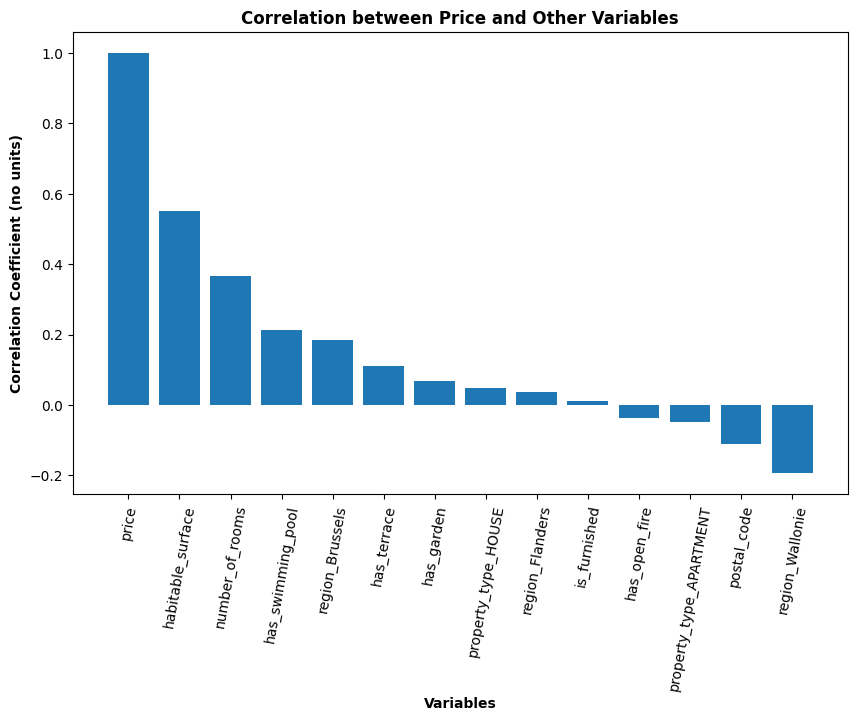

In [21]:
# Define categorical columns.
categorical_columns = ['region', 'property_type']

# Convert the categorical 'locality' column to numerical using one-hot encoding
encoded_data = pd.get_dummies(immo_dataset, columns=categorical_columns)

# Calculate the correlation using Pearson method
pearson_corr = encoded_data.corr(method='pearson')

# Sort the correlation values in descending order
sorted_correlation = pearson_corr.sort_values(by='price',ascending=False)

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.bar(sorted_correlation.index, sorted_correlation['price'])
plt.xlabel('Variables', fontweight='bold')
plt.ylabel('Correlation Coefficient (no units)', fontweight='bold')
plt.title('Correlation between Price and Other Variables', fontweight='bold')
plt.xticks(rotation=80)
plt.show()


Plot Correlation Heatmap.

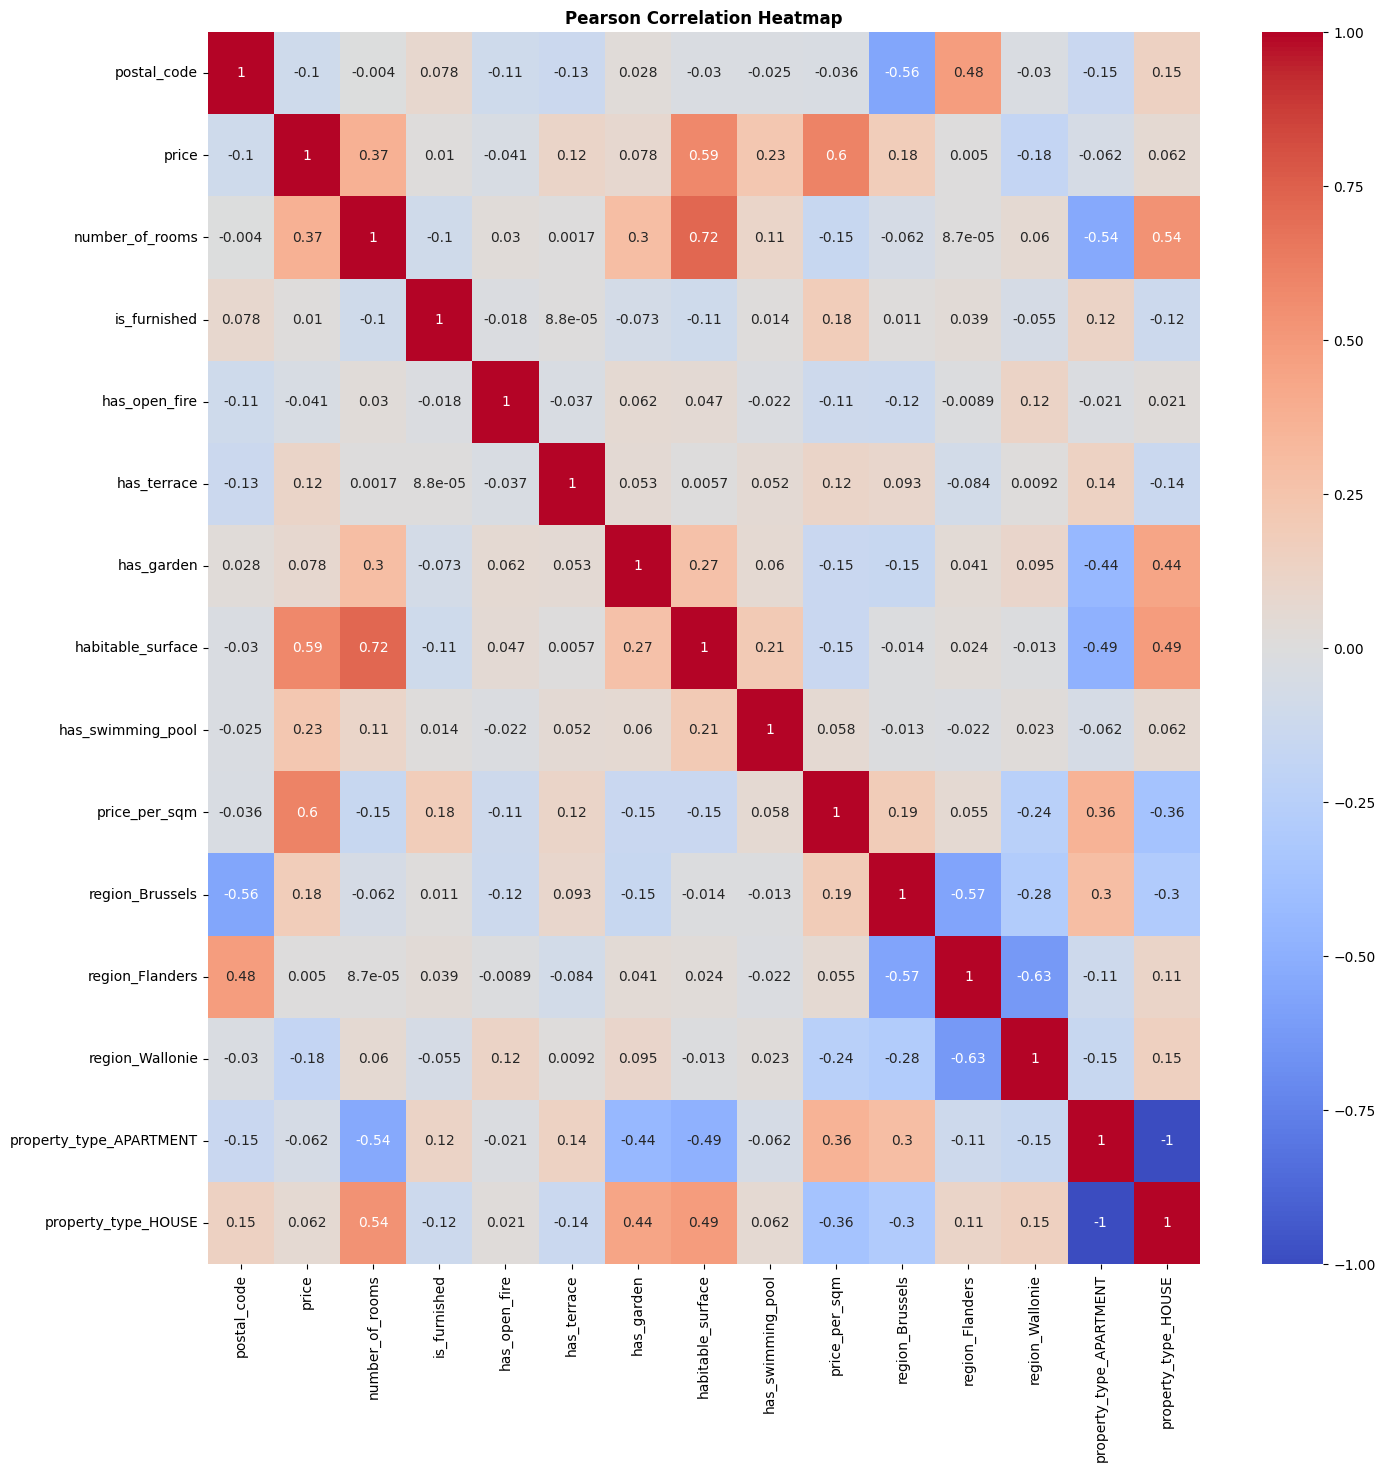

In [47]:
# Define categorical columns.
categorical_columns = ['region', 'property_type']

# Convert the categorical 'locality' column to numerical using one-hot encoding
encoded_data = pd.get_dummies(immo_dataset, columns=categorical_columns)

# Calculate the correlation using Pearson method
pearson_corr = encoded_data.corr(method='pearson')
# pearson_corr_filtered = pearson_corr[pearson_corr >= 0.5].sort_values(by= 'price', ascending=False)

# Plotting the correlation heatmap
plt.figure(figsize=(16, 16))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm')
plt.title('Pearson Correlation Heatmap', fontweight='bold')
plt.show()

How are variables correlated to each other? 

There is a positive correlation between number of rooms and habitable surface.
Also positive correlation between number of rooms and type of property:house.
Positive correaltion between price and habitable surface.

Calculate correlation of all variables between them.

In [23]:
# Define categorical columns.
categorical_columns = ['region', 'property_type']
# Convert the categorical 'locality' column to numerical using one-hot encoding
encoded_data = pd.get_dummies(immo_dataset, columns=categorical_columns)

# Calculate correlation coefficient.
correlation_coefficient = encoded_data.corr()

# Print the correlation coefficients
print(correlation_coefficient)

                         postal_code     price  number_of_rooms  is_furnished   
postal_code                 1.000000 -0.109748         0.000465      0.064386  \
price                      -0.109748  1.000000         0.365303      0.010790   
number_of_rooms             0.000465  0.365303         1.000000     -0.093732   
is_furnished                0.064386  0.010790        -0.093732      1.000000   
has_open_fire              -0.102531 -0.035966         0.032010     -0.016096   
has_terrace                -0.123649  0.109865         0.000707      0.005275   
has_garden                  0.024497  0.067707         0.268041     -0.062317   
habitable_surface          -0.013426  0.551158         0.695558     -0.096622   
has_swimming_pool          -0.023062  0.212725         0.106382      0.014715   
region_Brussels            -0.528299  0.185675        -0.075668      0.018926   
region_Flanders             0.376921  0.037156        -0.002718      0.034579   
region_Wallonie             

Which variables have the greatest influence on the price?

The variables with the most influence on property price are:

Habitable surface

Number of rooms

Presence of swimming pool

Region: Brussels

Presence of terrace.



Which variables have the least influence on the price?

The variables with the least influence on price are:

Region:Flanders

If it is furnished

If it has open fire

How many qualitative and quantitative variables are there? How would you transform these values into numerical values?

We have three quantitative and eight qualitative variables.

In [24]:
immo_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10892 entries, 0 to 11189
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   postal_code        10892 non-null  object 
 1   region             10873 non-null  object 
 2   property_type      10892 non-null  object 
 3   price              10891 non-null  float64
 4   number_of_rooms    10892 non-null  int64  
 5   is_furnished       10892 non-null  int64  
 6   has_open_fire      10892 non-null  int64  
 7   has_terrace        10892 non-null  int64  
 8   has_garden         10892 non-null  int64  
 9   habitable_surface  10299 non-null  float64
 10  has_swimming_pool  10892 non-null  int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 1021.1+ KB


Percentage of missing values per column?



In [25]:
missing_percentage = immo_dataset.isna().mean() * 100
print(missing_percentage)

postal_code          0.000000
region               0.174440
property_type        0.000000
price                0.009181
number_of_rooms      0.000000
is_furnished         0.000000
has_open_fire        0.000000
has_terrace          0.000000
has_garden           0.000000
habitable_surface    5.444363
has_swimming_pool    0.000000
dtype: float64


Step 3 : Data Interpretation

Plot the outliers.

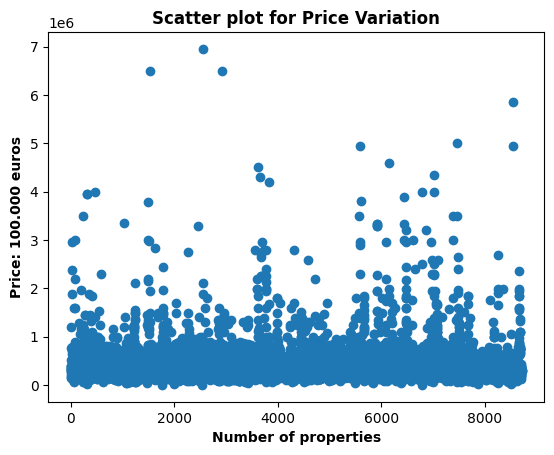

In [48]:
#Convert 'price' column to Pandas Series
price_series = pd.Series(immo_dataset['price'])

#Create the scatter plot
plt.scatter(range(len(price_series)), price_series)

#Set plot title and labels
plt.title('Scatter plot for Price Variation', fontweight='bold')
plt.xlabel('Number of properties', fontweight='bold')
plt.ylabel('Price: 100.000 euros', fontweight='bold')
plt.savefig("outliers_plot.jpg")

#Display the scatter plot
plt.show()

In [27]:
immo_dataset.drop(immo_dataset[(immo_dataset['price'] >= 2000000) & (immo_dataset['postal_code'] == '9400')].index, inplace=True)
property_counts = immo_dataset['postal_code'].value_counts()
immo_dataset = immo_dataset[immo_dataset['postal_code'].isin(property_counts[property_counts >= 10].index)]
immo_dataset.drop(immo_dataset[(immo_dataset['habitable_surface'] <=20)].index, inplace=True)
immo_dataset.to_csv("outliersremoved.csv")



Which variables would you delete and why ?


 'contruction_year',  'living_area', 'kitchen_fully_equiped', 'terrace_area', 'garden_surface', 'plot_land_surface', 'number_of_facades', 'building_state'

We deleted the above variables beacause they had a significant percentage of missing values.

'subtype_property',type_of_sale. 

We deleted the above variables beacause they had no significant influence on the price of properties.

'locality',

we deleted this variable because it wasn't useful to our analysis, we used postal code instead.

Represent the number of properties according to their surface using a histogram.


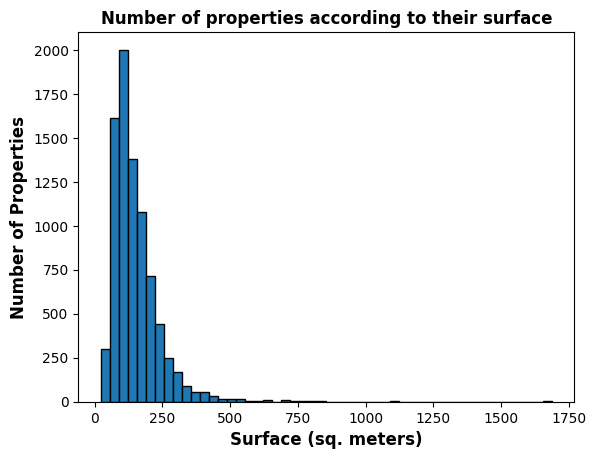

In [49]:
# Extract the 'habitable_surface' data
surface = immo_dataset['habitable_surface']

# Create the histogram
plt.hist(surface, bins=50, edgecolor='black')

# Label the axes and add a title
plt.xlabel('Surface (sq. meters)',fontsize=12, fontweight='bold')
plt.ylabel('Number of Properties',fontsize=12, fontweight='bold')
plt.title('Number of properties according to their surface', fontweight='bold')
plt.savefig("histogram_properties.jpg")

# Display the histogram
plt.show()



In your opinion, which 5 variables are the most important and why?


The variables with the most influence on property price are:

Habitable surface: the biggest the surface the biggest the price.

Number of rooms : construction cost increases as the number of room increases.

Presence of swimming pool: it is a luxury.

Region: Brussels : great population density -> higher demand over supply

Presence of terrace: convenience, being able to sit and drink your coffee.

What are the most expensive municipalities in Belgium? (Average price, median price, price per square meter)


In [29]:
# Calculate price per square meter
immo_dataset['price_per_sqm'] = immo_dataset['price'] / immo_dataset['habitable_surface']

# Group by region and calculate the average price, median price, and price per square meter
region_stats = immo_dataset.groupby('postal_code').agg(
    average_price=('price', 'mean'),
    median_price=('price', 'median')    
)

# Sort the regions based on the index (region names) in ascending order
sorted_regions = region_stats.sort_index()

# Sort the regions based on the average price in descending order
most_expensive_regions = region_stats.sort_values(by='average_price', ascending=False).head(5)

# Print the most expensive regions and their corresponding statistics
print("Most Expensive Regions in Belgium:")
print(most_expensive_regions)

Most Expensive Regions in Belgium:
             average_price  median_price
postal_code                             
8300          1.345862e+06      942500.0
1640          1.235385e+06      995000.0
1050          1.014677e+06      699000.0
1380          9.031683e+05      597000.0
1950          8.244333e+05      657500.0


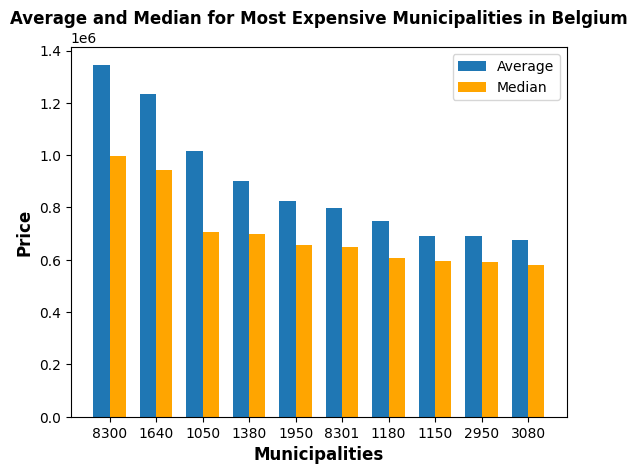

In [30]:
# Calculate price per square meter
immo_dataset['price_per_sqm'] = immo_dataset['price'] / immo_dataset['habitable_surface']

# Group by postal code and calculate the average price and median price
postal_code_stats = immo_dataset.groupby('postal_code').agg(
    average_price=('price', 'mean'),
    median_price=('price', 'median'),
)

# Sort the postal codes based on the average price in ascending order
most_expensive_postal_codes_average = postal_code_stats.nlargest(10, 'average_price')
most_expensive_postal_codes_median = postal_code_stats.nlargest(10, 'median_price')

labels = most_expensive_postal_codes_average.index
x = np.arange(len(labels))

fig, ax = plt.subplots()
width = 0.35
ax.bar(x - width/2, most_expensive_postal_codes_average['average_price'], width, label='Average')
ax.bar(x + width/2, most_expensive_postal_codes_median['median_price'], width, label='Median', color='orange')
ax.set_xlabel('Municipalities', fontsize=12, fontweight='bold')
ax.set_ylabel('Price', fontsize=12, fontweight='bold')
ax.set_title('Average and Median for Most Expensive Municipalities in Belgium', fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

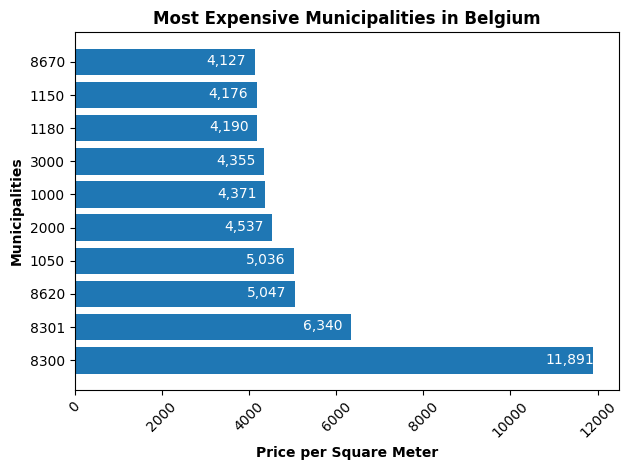

In [31]:
# Group by postal code and calculate the price per square meter
postal_code_stats = immo_dataset.groupby('postal_code').agg(
    average_price=('price', 'mean'),
    median_price=('price', 'median'),
    price_per_sqm=('price_per_sqm', 'mean')
)
# Get the most expensive postal codes
most_expensive_postal_codes = postal_code_stats.nlargest(10, 'price_per_sqm')

# Extract the price per square meter values and labels
price_per_square_meter_values = most_expensive_postal_codes['price_per_sqm']
labels = most_expensive_postal_codes.index

fig, ax = plt.subplots()
width = 0.35
ax.barh(labels, price_per_square_meter_values)
ax.set_xlabel('Price per Square Meter', fontweight='bold')
ax.set_ylabel('Municipalities', fontweight='bold')
ax.set_title('Most Expensive Municipalities in Belgium', fontweight='bold')
ax.tick_params(axis='x', rotation=45)
for index, value in enumerate(price_per_square_meter_values):
    label = format(int(value), ',')
    plt.annotate(label, xy=(value-1100, index-0.1), color='white')
plt.tight_layout()
plt.savefig("belgium_expensive_PSQM.jpg")

plt.show()

What are the most expensive municipalities in Wallonia? (Average price, median price, price per square meter)


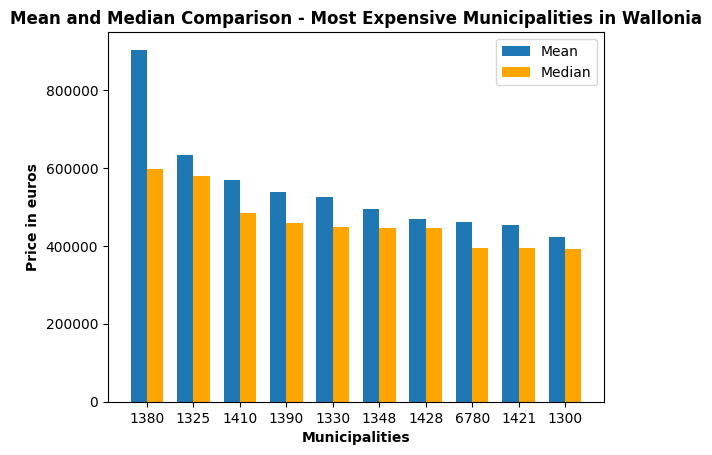

In [32]:
# Filter the dataset for Wallonia
wallonia_dataset = immo_dataset[immo_dataset['region'] == 'Wallonie']

# Group by postal code and calculate the average price andmedian price
postal_code_stats = wallonia_dataset.groupby('postal_code').agg(
    average_price=('price', 'mean'),
    median_price=('price', 'median'),
)

# Sort the postal codes based on the average price in ascending order
most_expensive_postal_codes_average = postal_code_stats.nlargest(10, 'average_price')
most_expensive_postal_codes_median = postal_code_stats.nlargest(10, 'median_price')

labels = most_expensive_postal_codes_average.index
x = np.arange(len(labels))

fig, ax = plt.subplots()

width = 0.35

ax.bar(x - width/2, most_expensive_postal_codes_average['average_price'], width, label='Mean')
ax.bar(x + width/2, most_expensive_postal_codes_median['median_price'], width, label='Median', color='orange')

ax.set_xlabel('Municipalities', fontweight='bold')
ax.set_ylabel('Price in euros', fontweight='bold')
ax.set_title('Mean and Median Comparison - Most Expensive Municipalities in Wallonia', fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.savefig("wallonia_expensive_MM.jpg")

plt.show()


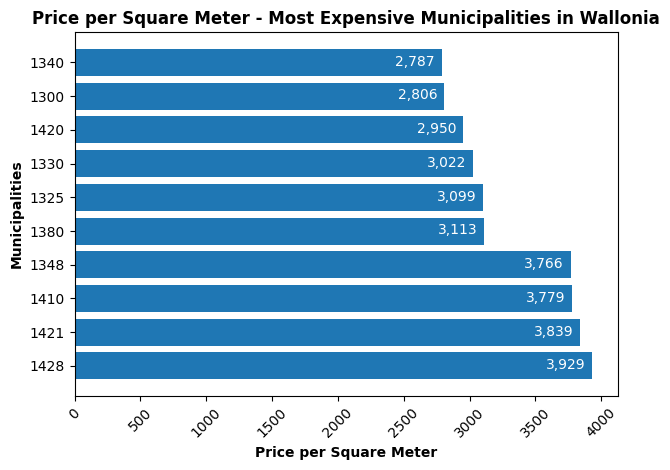

In [33]:
# Filter the dataset for Wallonia
wallonia_dataset = immo_dataset[immo_dataset['region'] == 'Wallonie']

# Group by postal code and calculate the average price, median price, and price per square meter
postal_code_stats = wallonia_dataset.groupby('postal_code').agg(
    average_price=('price', 'mean'),
    median_price=('price', 'median'),
    price_per_sqm=('price_per_sqm', 'mean')
)

# Get the least expensive postal codes
most_expensive_postal_codes = postal_code_stats.nlargest(10, 'price_per_sqm')

# Extract the price per square meter values and labels
price_per_square_meter_values = most_expensive_postal_codes['price_per_sqm']
labels = most_expensive_postal_codes.index

fig, ax = plt.subplots()
width = 0.35
ax.barh(labels, price_per_square_meter_values)
ax.set_xlabel('Price per Square Meter', fontweight='bold')
ax.set_ylabel('Municipalities', fontweight='bold')
ax.set_title('Price per Square Meter - Most Expensive Municipalities in Wallonia', fontweight='bold')
ax.tick_params(axis='x', rotation=45)
for index, value in enumerate(price_per_square_meter_values):
    label = format(int(value), ',')
    plt.annotate(label, xy=(value-350, index-0.1), color='white')
plt.tight_layout()
plt.show()

What are the most expensive municipalities in Flanders? (Average price, median price, price per square meter)


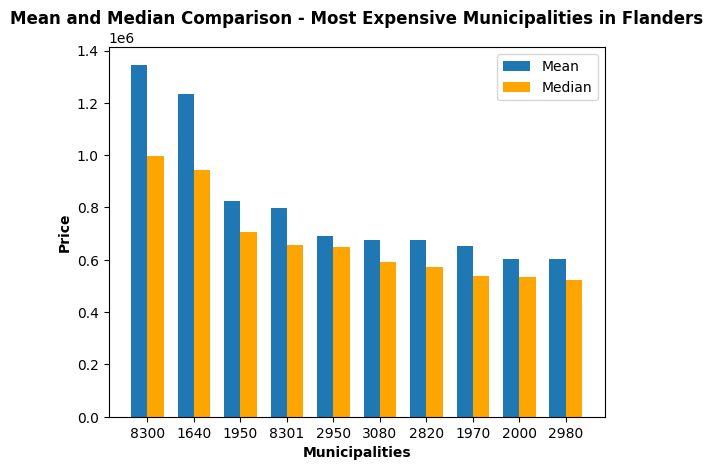

In [34]:
# Filter the dataset for Flanders
flanders_dataset = immo_dataset[immo_dataset['region'] == 'Flanders']

# Group by postal code and calculate the average price, median price
postal_code_stats = flanders_dataset.groupby('postal_code').agg(
    average_price=('price', 'mean'),
    median_price=('price', 'median'),
)

# Sort the postal codes based on the average price in ascending order
most_expensive_postal_codes_average = postal_code_stats.nlargest(10, 'average_price')
most_expensive_postal_codes_median = postal_code_stats.nlargest(10, 'median_price')

labels = most_expensive_postal_codes_average.index
x = np.arange(len(labels))

fig, ax = plt.subplots()
width = 0.35
ax.bar(x - width/2, most_expensive_postal_codes_average['average_price'], width, label='Mean')
ax.bar(x + width/2, most_expensive_postal_codes_median['median_price'], width, label='Median', color='orange')
ax.set_xlabel('Municipalities', fontweight='bold')
ax.set_ylabel('Price', fontweight='bold')
ax.set_title('Mean and Median Comparison - Most Expensive Municipalities in Flanders', fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.savefig("Flanders_expensive_MM.jpg")
plt.show()


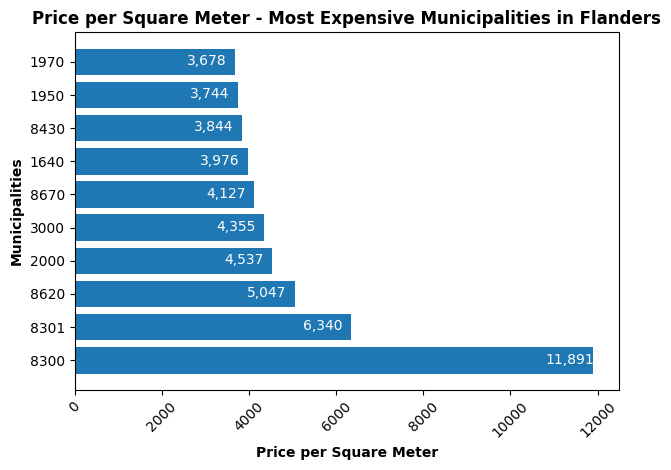

In [35]:
# Filter the dataset for Flanders
flanders_dataset = immo_dataset[immo_dataset['region'] == 'Flanders']

# Group by postal code and calculate the price per square meter
postal_code_stats = flanders_dataset.groupby('postal_code').agg(
    average_price=('price', 'mean'),
    median_price=('price', 'median'),
    price_per_sqm=('price_per_sqm', 'mean')
)

# Get the least expensive postal codes
most_expensive_postal_codes = postal_code_stats.nlargest(10, 'price_per_sqm')

# Extract the price per square meter values and labels
price_per_square_meter_values = most_expensive_postal_codes['price_per_sqm']
labels = most_expensive_postal_codes.index

fig, ax = plt.subplots()
width = 0.35
ax.barh(labels, price_per_square_meter_values)
ax.set_xlabel('Price per Square Meter', fontweight='bold')
ax.set_ylabel('Municipalities', fontweight='bold')
ax.set_title('Price per Square Meter - Most Expensive Municipalities in Flanders', fontweight='bold')
ax.tick_params(axis='x', rotation=45)
for index, value in enumerate(price_per_square_meter_values):
    label = format(int(value), ',')
    plt.annotate(label, xy=(value-1100, index-0.1), color='white')
plt.tight_layout()
plt.show()

What are the less expensive municipalities in Belgium? (Average price, median price, price per square meter)


In [36]:

# Calculate price per square meter
immo_dataset['price_per_sqm'] = immo_dataset['price'] / immo_dataset['habitable_surface']

# Group by region and calculate the average price, median price, and price per square meter
region_stats = immo_dataset.groupby('postal_code').agg(
    average_price=('price', 'mean'),
    median_price=('price', 'median')    
)

# Sort the regions based on the index (region names) in ascending order
sorted_regions = region_stats.sort_index()

# Sort the regions based on the average price in descending order
least_expensive_regions = region_stats.sort_values(by='average_price', ascending=True).head(5)

# Print the most expensive regions and their corresponding statistics
print("Less Expensive Regions in Belgium:")
print(least_expensive_regions)


Less Expensive Regions in Belgium:
             average_price  median_price
postal_code                             
4820         101133.333333      105000.0
6001         121560.000000      112500.0
7340         148464.285714      154000.0
7110         154119.047619      155000.0
7700         163490.909091      165000.0


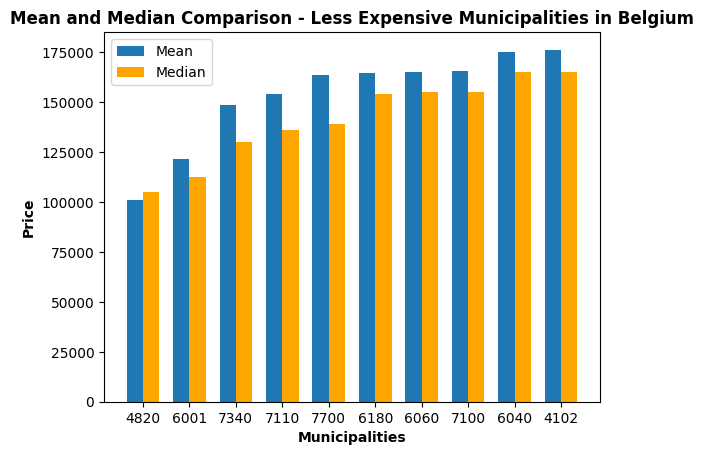

In [37]:
# Calculate price per square meter
immo_dataset['price_per_sqm'] = immo_dataset['price'] / immo_dataset['habitable_surface']

# Group by postal code and calculate the average price, median price, and price per square meter
postal_code_stats = immo_dataset.groupby('postal_code').agg(
    average_price=('price', 'mean'),
    median_price=('price', 'median'),
)
# Sort the postal codes based on the average price in ascending order
least_expensive_postal_codes_average = postal_code_stats.nsmallest(10, 'average_price')
least_expensive_postal_codes_median = postal_code_stats.nsmallest(10, 'median_price')

labels = least_expensive_postal_codes_average.index
x = np.arange(len(labels))

fig, ax = plt.subplots()

width = 0.35

ax.bar(x - width/2, least_expensive_postal_codes_average['average_price'], width, label='Mean')
ax.bar(x + width/2, least_expensive_postal_codes_median['median_price'], width, label='Median', color='orange')

ax.set_xlabel('Municipalities', fontweight='bold')
ax.set_ylabel('Price', fontweight='bold')
ax.set_title('Mean and Median Comparison - Less Expensive Municipalities in Belgium', fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.savefig("belgium_cheapest_MM.jpg")
plt.show()

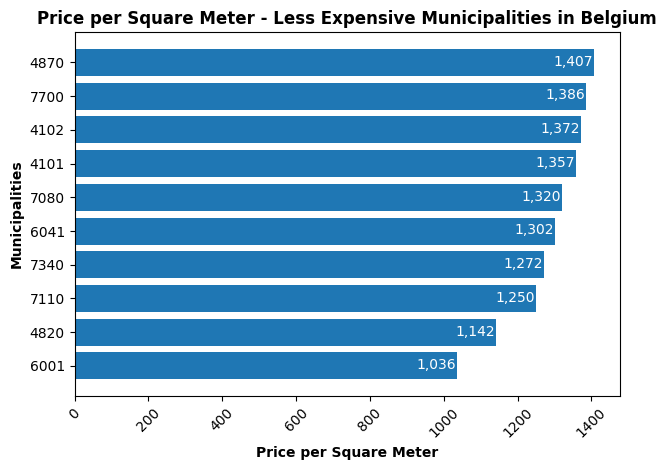

In [38]:
# Group by postal code and calculate the average price, median price, and price per square meter
postal_code_stats = immo_dataset.groupby('postal_code').agg(
    average_price=('price', 'mean'),
    median_price=('price', 'median'),
    price_per_sqm=('price_per_sqm', 'mean')
)

# Get the least expensive postal codes
least_expensive_postal_codes = postal_code_stats.nsmallest(10, 'price_per_sqm')

# Extract the price per square meter values and labels
price_per_square_meter_values = least_expensive_postal_codes['price_per_sqm']
labels = least_expensive_postal_codes.index

fig, ax = plt.subplots()
width = 0.35
ax.barh(labels, price_per_square_meter_values)
ax.set_xlabel('Price per Square Meter', fontweight='bold')
ax.set_ylabel('Municipalities', fontweight='bold')
ax.set_title('Price per Square Meter - Less Expensive Municipalities in Belgium', fontweight='bold')
ax.tick_params(axis='x', rotation=45)
for index, value in enumerate(price_per_square_meter_values):
    label = format(int(value), ',')
    plt.annotate(label, xy=(value-110, index-0.1), color='white')
plt.tight_layout()
plt.show()

What are the less expensive municipalities in Wallonia? (Average price, median price, price per square meter)


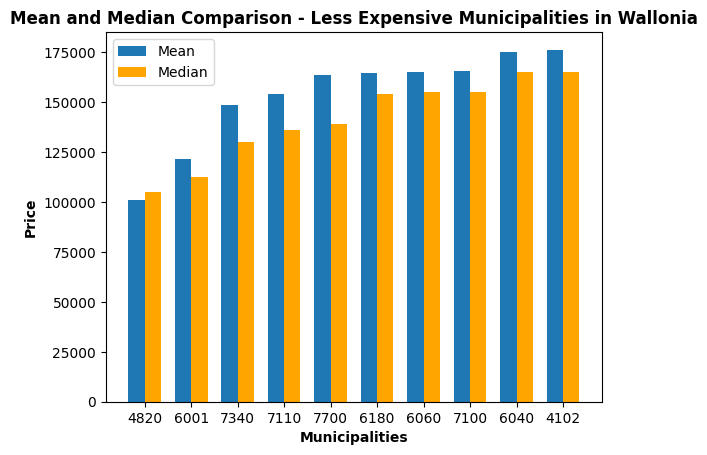

In [39]:
# Filter the dataset for Wallonia
wallonia_dataset = immo_dataset[immo_dataset['region'] == 'Wallonie']

# Group by postal code and calculate the average price, median price
postal_code_stats = wallonia_dataset.groupby('postal_code').agg(
    average_price=('price', 'mean'),
    median_price=('price', 'median'),
)

# Sort the postal codes based on the average price in ascending order
least_expensive_postal_codes_average = postal_code_stats.nsmallest(10, 'average_price')
least_expensive_postal_codes_median = postal_code_stats.nsmallest(10, 'median_price')

labels = least_expensive_postal_codes_average.index
x = np.arange(len(labels))

fig, ax = plt.subplots()
width = 0.35
ax.bar(x - width/2, least_expensive_postal_codes_average['average_price'], width, label='Mean',)
ax.bar(x + width/2, least_expensive_postal_codes_median['median_price'], width, label='Median', color='orange')
#ax.bar(x + width, price_per_square_meter_values, width, label='Price per square meter', color='green')

ax.set_xlabel('Municipalities', fontweight='bold')
ax.set_ylabel('Price', fontweight='bold')
ax.set_title('Mean and Median Comparison - Less Expensive Municipalities in Wallonia', fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.savefig("walloinia_cheapest_MM.jpg")

plt.show()

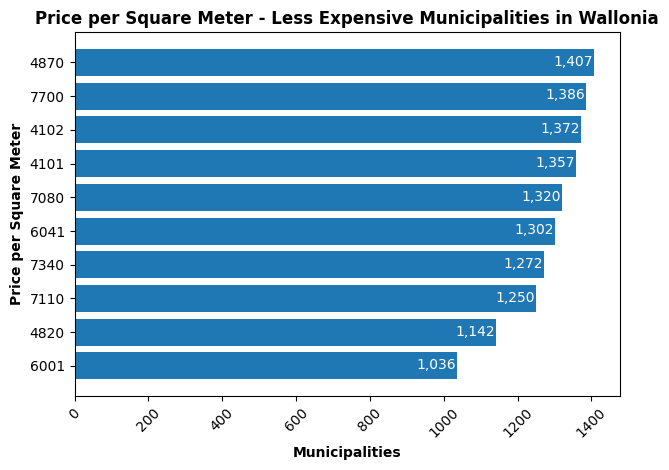

In [40]:

# Filter the dataset for Wallonia
wallonia_dataset = immo_dataset[immo_dataset['region'] == 'Wallonie']

# Group by postal code and calculate the price per square meter
postal_code_stats = wallonia_dataset.groupby('postal_code').agg(
    average_price=('price', 'mean'),
    median_price=('price', 'median'),
    price_per_sqm=('price_per_sqm', 'mean')
)

# Get the least expensive postal codes
least_expensive_postal_codes = postal_code_stats.nsmallest(10, 'price_per_sqm')

# Extract the price per square meter values and labels
price_per_square_meter_values = least_expensive_postal_codes['price_per_sqm']
labels = least_expensive_postal_codes.index

fig, ax = plt.subplots()
width = 0.35
ax.barh(labels, price_per_square_meter_values)
ax.set_xlabel('Municipalities', fontweight='bold')
ax.set_ylabel('Price per Square Meter', fontweight='bold')
ax.set_title('Price per Square Meter - Less Expensive Municipalities in Wallonia', fontweight='bold')
ax.tick_params(axis='x', rotation=45)
for index, value in enumerate(price_per_square_meter_values):
    label = format(int(value), ',')
    plt.annotate(label, xy=(value-110, index-0.1), color='white')
plt.tight_layout()
plt.show()

What are the less expensive municipalities in Flanders? (Average price, median price, price per square meter)


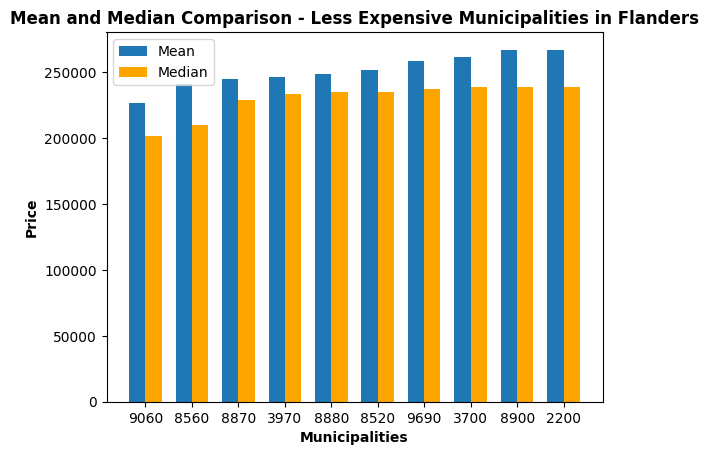

In [41]:

# Filter the dataset for Flanders
flanders_dataset = immo_dataset[immo_dataset['region'] == 'Flanders']

# Group by postal code and calculate the average price, median price
postal_code_stats = flanders_dataset.groupby('postal_code').agg(
    average_price=('price', 'mean'),
    median_price=('price', 'median'),
)

# Sort the postal codes based on the average price in ascending order
least_expensive_postal_codes_average = postal_code_stats.nsmallest(10, 'average_price')
least_expensive_postal_codes_median = postal_code_stats.nsmallest(10, 'median_price')

labels = least_expensive_postal_codes_average.index
x = np.arange(len(labels))

fig, ax = plt.subplots()
width = 0.35
ax.bar(x - width/2, least_expensive_postal_codes_average['average_price'], width, label='Mean')
ax.bar(x + width/2, least_expensive_postal_codes_median['median_price'], width, label='Median', color='orange')

ax.set_xlabel('Municipalities', fontweight='bold')
ax.set_ylabel('Price', fontweight='bold')
ax.set_title('Mean and Median Comparison - Less Expensive Municipalities in Flanders', fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.savefig("Flanders_cheapest_MM.jpg")

plt.show()


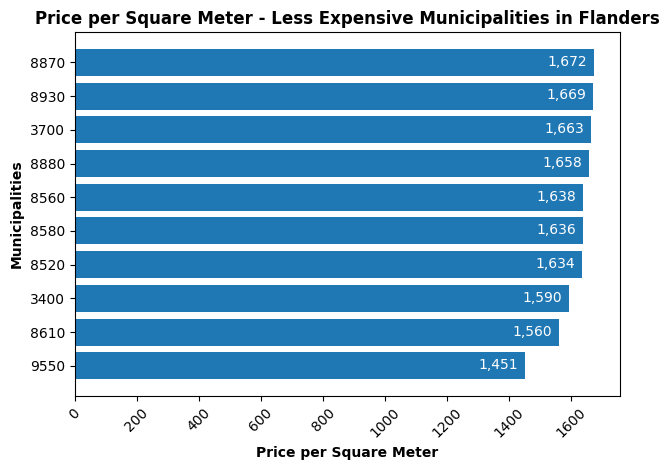

In [42]:
# Filter the dataset for Flanders
flanders_dataset = immo_dataset[immo_dataset['region'] == 'Flanders']

# Group by postal code and calculate the price per square meter
postal_code_stats = flanders_dataset.groupby('postal_code').agg(
    average_price=('price', 'mean'),
    median_price=('price', 'median'),
    price_per_sqm=('price_per_sqm', 'mean')
)
# Get the least expensive postal codes
least_expensive_postal_codes = postal_code_stats.nsmallest(10, 'price_per_sqm')

# Extract the price per square meter values and labels
price_per_square_meter_values = least_expensive_postal_codes['price_per_sqm']
labels = least_expensive_postal_codes.index

fig, ax = plt.subplots()
width = 0.35
ax.barh(labels, price_per_square_meter_values)
ax.set_xlabel('Price per Square Meter', fontweight='bold')
ax.set_ylabel('Municipalities', fontweight='bold')
ax.set_title('Price per Square Meter - Less Expensive Municipalities in Flanders', fontweight='bold')
ax.tick_params(axis='x', rotation=45)
for index, value in enumerate(price_per_square_meter_values):
    label = format(int(value), ',')
    plt.annotate(label, xy=(value-150, index-0.1), color='white')
plt.tight_layout()
plt.show()

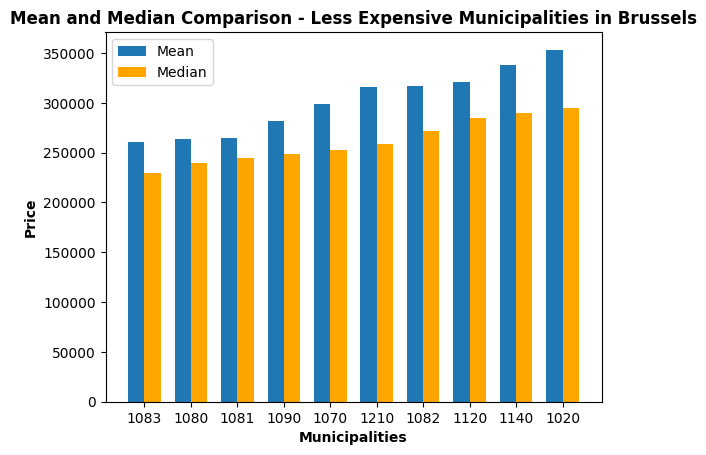

In [43]:
# Filter the dataset for Flanders
brussels_dataset = immo_dataset[immo_dataset['region'] == 'Brussels']

# Group by postal code and calculate the average price, median price
postal_code_stats = brussels_dataset.groupby('postal_code').agg(
    average_price=('price', 'mean'),
    median_price=('price', 'median'),
)

# Sort the postal codes based on the average price in ascending order
least_expensive_postal_codes_average = postal_code_stats.nsmallest(10, 'average_price')
least_expensive_postal_codes_median = postal_code_stats.nsmallest(10, 'median_price')

labels = least_expensive_postal_codes_average.index
x = np.arange(len(labels))

fig, ax = plt.subplots()
width = 0.35
ax.bar(x - width/2, least_expensive_postal_codes_average['average_price'], width, label='Mean')
ax.bar(x + width/2, least_expensive_postal_codes_median['median_price'], width, label='Median', color='orange')

ax.set_xlabel('Municipalities', fontweight='bold')
ax.set_ylabel('Price', fontweight='bold')
ax.set_title('Mean and Median Comparison - Less Expensive Municipalities in Brussels', fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.savefig("Brussels_cheapest_MM.jpg")

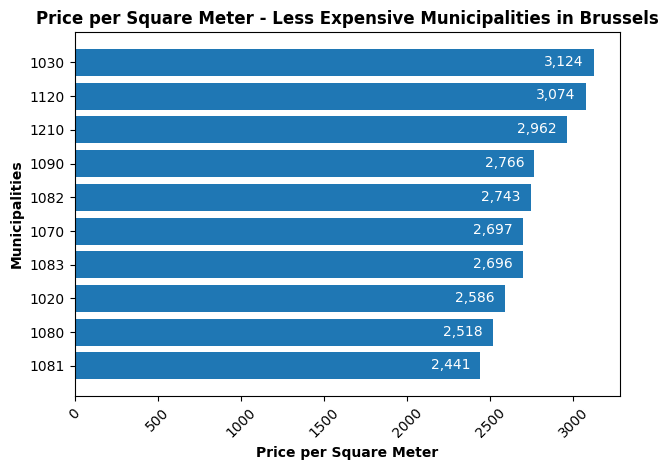

In [44]:
# Filter the dataset for Flanders
brussels_dataset = immo_dataset[immo_dataset['region'] == 'Brussels']

# Group by postal code and calculate the price per square meter
postal_code_stats = brussels_dataset.groupby('postal_code').agg(
    average_price=('price', 'mean'),
    median_price=('price', 'median'),
    price_per_sqm=('price_per_sqm', 'mean')
)
# Get the least expensive postal codes
least_expensive_postal_codes = postal_code_stats.nsmallest(10, 'price_per_sqm')

# Extract the price per square meter values and labels
price_per_square_meter_values = least_expensive_postal_codes['price_per_sqm']
labels = least_expensive_postal_codes.index

fig, ax = plt.subplots()
width = 0.35
ax.barh(labels, price_per_square_meter_values)
ax.set_xlabel('Price per Square Meter', fontweight='bold')
ax.set_ylabel('Municipalities', fontweight='bold')
ax.set_title('Price per Square Meter - Less Expensive Municipalities in Brussels', fontweight='bold')
ax.tick_params(axis='x', rotation=45)
for index, value in enumerate(price_per_square_meter_values):
    label = format(int(value), ',')
    plt.annotate(label, xy=(value-300, index-0.1), color='white')
plt.tight_layout()
plt.savefig("brussels_cheapeat_PSQM.jpg")

plt.show()

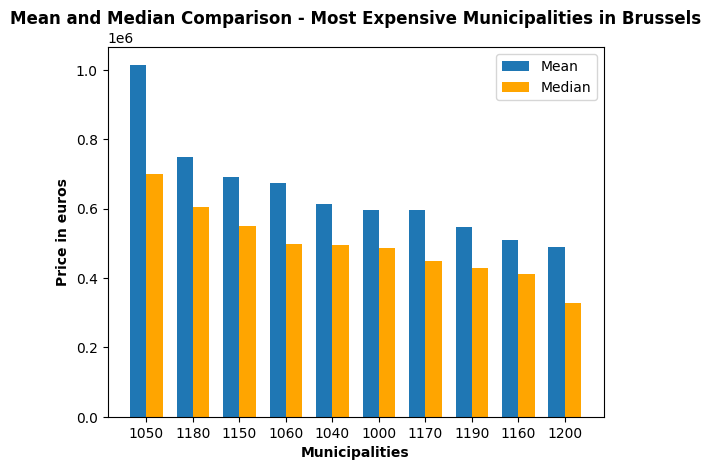

In [45]:
brussels_dataset = immo_dataset[immo_dataset['region'] == 'Brussels']

# Group by postal code and calculate the average price andmedian price
postal_code_stats = brussels_dataset.groupby('postal_code').agg(
    average_price=('price', 'mean'),
    median_price=('price', 'median'),
)

# Sort the postal codes based on the average price in ascending order
most_expensive_postal_codes_average = postal_code_stats.nlargest(10, 'average_price')
most_expensive_postal_codes_median = postal_code_stats.nlargest(10, 'median_price')

labels = most_expensive_postal_codes_average.index
x = np.arange(len(labels))

fig, ax = plt.subplots()

width = 0.35

ax.bar(x - width/2, most_expensive_postal_codes_average['average_price'], width, label='Mean')
ax.bar(x + width/2, most_expensive_postal_codes_median['median_price'], width, label='Median', color='orange')

ax.set_xlabel('Municipalities', fontweight='bold')
ax.set_ylabel('Price in euros', fontweight='bold')
ax.set_title('Mean and Median Comparison - Most Expensive Municipalities in Brussels', fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.savefig("brussels_expensive_MM.jpg")

plt.show()

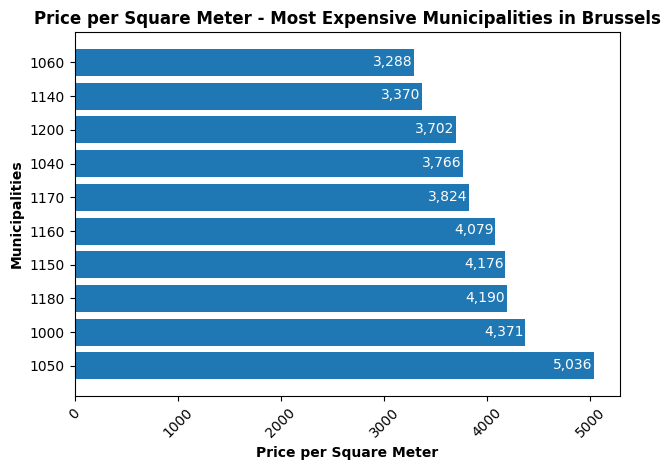

In [46]:
# Filter the dataset for Wallonia
brussels_dataset = immo_dataset[immo_dataset['region'] == 'Brussels']

# Group by postal code and calculate the average price, median price, and price per square meter
postal_code_stats = brussels_dataset.groupby('postal_code').agg(
    average_price=('price', 'mean'),
    median_price=('price', 'median'),
    price_per_sqm=('price_per_sqm', 'mean')
)

# Get the least expensive postal codes
most_expensive_postal_codes = postal_code_stats.nlargest(10, 'price_per_sqm')

# Extract the price per square meter values and labels
price_per_square_meter_values = most_expensive_postal_codes['price_per_sqm']
labels = most_expensive_postal_codes.index

fig, ax = plt.subplots()
width = 0.35
ax.barh(labels, price_per_square_meter_values)
ax.set_xlabel('Price per Square Meter', fontweight='bold')
ax.set_ylabel('Municipalities', fontweight='bold')
ax.set_title('Price per Square Meter - Most Expensive Municipalities in Brussels', fontweight='bold')
ax.tick_params(axis='x', rotation=45)
for index, value in enumerate(price_per_square_meter_values):
    label = format(int(value), ',')
    plt.annotate(label, xy=(value-400, index-0.1), color='white')
plt.tight_layout()
plt.savefig("brussels_expensive_PSQM.jpg")
plt.show()